In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(df)
np.random.shuffle(data)
dev=data[0:2000]
train=data[2000:data.shape[0]]
train=train.T
n,m=train.shape
train_Y=train[0].reshape(1,m)
train_X=train[1:n]
train_X=train_X/255

In [5]:
dev=dev.T
dev_Y=dev[0].reshape(1,2000)
dev_X=dev[1:dev.shape[0]]
print(dev_Y.shape)
print(dev_X.shape)

(1, 2000)
(784, 2000)


In [6]:
n=train_X.shape[0]
print(train_Y.shape)
print(train_X.shape)
print(n,m)

(1, 40000)
(784, 40000)
784 40000


In [7]:
train_Y.max()

9

In [8]:
train_X.max()

1.0

In [9]:
def initialize_parameters(n_x,n_h,n_y):
    parameters={}
    parameters["W1"]=np.random.randn(n_h,n_x)*0.01
    parameters["b1"]=np.zeros((n_h,1))
    parameters["W2"]=np.random.randn(n_y,n_h)*0.01
    parameters["b2"]=np.zeros((n_y,1))
    return parameters

In [10]:
def linear_forward(A_prev,W,b):
    Z=np.dot(W,A_prev)+b
    cache=(A_prev,W,b)
    return Z,cache

In [11]:
def RELU(Z):
    temp=Z
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if Z[i][j]<0:
                Z[i][j]=0
    A=Z
    return A,temp

In [12]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    cache=Z
    return A,cache

In [13]:
def linear_activation_forward(A_prev,W,b,activation):
    if activation=='relu':
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=RELU(Z)
    if activation=='softmax':
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=softmax(Z)
    cache=(linear_cache,activation_cache)
    return A,cache

In [14]:
# def compute_cost(AL,Y):
#     m=Y.shape[1]
#     temp=(Y*np.log(AL))+((1-Y)*np.log(1-AL))
#     cost=(-1/m)*np.

In [15]:
def accuracy(AL,Y):
    #shape of AL=(10,m),Y=(10,m)
    return np.sum(np.argmax(AL,0)==np.argmax(Y,0))/Y.shape[1]

In [16]:
def linear_backward(dZ,cache):
    A_prev,W,b=cache
    m=A_prev.shape[1]
    dW=(1/m)*np.dot(dZ,A_prev.T)
    db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev=np.dot(W.T,dZ)
    return dA_prev,dW,db

In [17]:
def backward_relu(dA,cache):
    Z=cache
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if Z[i][j]<=0:
                Z[i][j]=0
    dZ=Z*dA
    return dZ

In [18]:
def backward_softmax(dA,cache):
    Z=cache
    a,c=softmax(Z)
    temp=a*(1-a)
    dZ=dA*temp
    return dZ

In [19]:
def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache=cache
    if activation=='relu':
        dZ=backward_relu(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    if activation=='softmax':
        dZ=backward_softmax(dA,activation_cache)
        dA_prev,dW,db=linear_backward(dZ,linear_cache)
    return dA_prev,dW,db  

In [20]:
def update_parameters(parameters,grads,learning_rate):
    param=parameters.copy()
    param["W1"]=param["W1"]-(learning_rate*grads["dW1"])
    param["b1"]=param["b1"]-(learning_rate*grads["db1"])
    param["W2"]=param["W2"]-(learning_rate*grads["dW2"])
    param["b2"]=param["b2"]-(learning_rate*grads["db2"])
    return param

In [21]:
def one_hot_encode(Y):
    one_Y=np.zeros((Y.shape[1],10))
    one_Y[np.arange(Y.shape[1]),Y]=1
    return one_Y.T

In [22]:
def two_layer_model(X,Y,learning_rate,num_iterations):
    grads={}
    m=X.shape[1]
    n_x,n_h,n_y=X.shape[0],10,10
    parameters=initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0,num_iterations):
        A1,cache1=linear_activation_forward(X,W1,b1,'relu')
        A2,cache2=linear_activation_forward(A1,W2,b2,'softmax')
        
        dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        
        dA1,dW2,db2=linear_activation_backward(dA2,cache2,'softmax')
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if i%10==0:
            print("Iteration No."+str(i))
            print(accuracy(A2,Y))
        
    return parameters

In [23]:
one_Y=one_hot_encode(train_Y)

In [24]:
parameters=two_layer_model(train_X,one_Y,0.1,500)

Iteration No.0
0.09465
Iteration No.10
0.11155
Iteration No.20
0.1114
Iteration No.30
0.1114
Iteration No.40
0.1114
Iteration No.50
0.1114
Iteration No.60
0.1114
Iteration No.70
0.120875
Iteration No.80
0.202375
Iteration No.90
0.199675
Iteration No.100
0.109225
Iteration No.110
0.14005
Iteration No.120
0.2667
Iteration No.130
0.385875
Iteration No.140
0.48985
Iteration No.150
0.62825
Iteration No.160
0.43795
Iteration No.170
0.567475
Iteration No.180
0.69245
Iteration No.190
0.717775
Iteration No.200
0.741025
Iteration No.210
0.7658
Iteration No.220
0.682925
Iteration No.230
0.756425
Iteration No.240
0.739525
Iteration No.250
0.7729
Iteration No.260
0.778725
Iteration No.270
0.792525
Iteration No.280
0.8028
Iteration No.290
0.811525
Iteration No.300
0.819625
Iteration No.310
0.8264
Iteration No.320
0.8317
Iteration No.330
0.836875
Iteration No.340
0.841325
Iteration No.350
0.844525
Iteration No.360
0.848025
Iteration No.370
0.85205
Iteration No.380
0.8547
Iteration No.390
0.857025
Ite

In [25]:
test_Y=one_hot_encode(dev_Y)

In [26]:
def test_set_accuracy(X,Y,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    A1,cache1=linear_activation_forward(X,W1,b1,'relu')
    A2,cache2=linear_activation_forward(A1,W2,b2,'softmax')
    print("The test set Accuracy is :- "+str(accuracy(A2,Y)))
    

In [27]:
test_set_accuracy(dev_X,test_Y,parameters)

The test set Accuracy is :- 0.519


C:\Users\arunav\AppData\Local\Temp\ipykernel_14536\3601929796.py:2: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\arunav\AppData\Local\Temp\ipykernel_14536\3601929796.py:2: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))


In [28]:
def user_img_test(X,parameters):
    W1=parameters['W1']
    b1=parameters['b1']
    W2=parameters['W2']
    b2=parameters['b2']
    A1,cache1=linear_activation_forward(X,W1,b1,'relu')
    A2,cache2=linear_activation_forward(A1,W2,b2,'softmax')
    print(np.argmax(A2,0)[0])

Actual Label:-3
Detected Level:-3


C:\Users\arunav\AppData\Local\Temp\ipykernel_14536\3601929796.py:2: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\arunav\AppData\Local\Temp\ipykernel_14536\3601929796.py:2: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))


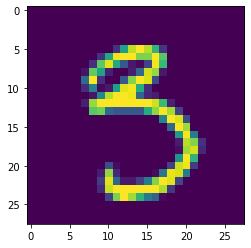

In [34]:
index=91
#img=df[index,1:].reshape((64,64))
img=dev_X[:,index].reshape((28,28))
plt.imshow(img)
print("Actual Label:-"+str(dev_Y[0,index]))
case1=dev_X[:,index].reshape((784,1))
print("Detected Level:-",end="")
user_img_test(case1,parameters)

In [65]:
case1=dev_X[:,index].reshape((784,1))

In [66]:
user_img_test(case1,parameters)

8


C:\Users\arunav\AppData\Local\Temp\ipykernel_8044\3601929796.py:2: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\arunav\AppData\Local\Temp\ipykernel_8044\3601929796.py:2: RuntimeWarning: invalid value encountered in true_divide
  A = np.exp(Z) / sum(np.exp(Z))
